## Data Augmentation


In [ ]:
import pandas as pd
from pathlib import Path
import random

from matplotlib import pyplot as plt
import torch
from PIL import Image

from src.dataloader.data_loader import CustomDataset, get_data_loader, get_image_transforms

In [2]:
train_data_dir = Path("../data/IDRiD/Train")
test_data_dir = Path("../data/IDRiD/Test")

train_data = pd.read_csv(train_data_dir/"annotations.csv")
test_data = pd.read_csv(test_data_dir/"annotations.csv")

In [3]:
size = (448, 448)
batch_size = 4

dataset = CustomDataset(dataset_path=train_data_dir, size=size, data_type="train")
print(f"Dataset length: {len(dataset)}")
data_loader = get_data_loader(dataset, batch_size)

for images, labels in data_loader:
    print(images.shape, labels)
    break
print("Data loader is ready.")


INFO:   Loading 1239 image_paths from ../data/IDRiD/Train...
INFO:   Loaded 1239 image_paths from ../data/IDRiD/Train.
Dataset length: 1239
torch.Size([4, 3, 448, 448]) tensor([0, 4, 1, 4])
Data loader is ready.


In [ ]:
def denormalize(tensor, mean, std):
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return tensor * std + mean


def show_original_and_augmentations(image_path, aug_transform, n=4):
    mean = [0.485, 0.456, 0.406]  # EfficientNet / ImageNet
    std = [0.229, 0.224, 0.225]

    img = Image.open(image_path).convert("RGB")

    fig, axes = plt.subplots(1, n + 1, figsize=(4 * (n + 1), 4))

    axes[0].imshow(img)
    axes[0].axis("off")
    axes[0].set_title("Original")

    for i in range(n):
        augmented = aug_transform(img)

        # denormalize
        augmented = augmented * torch.tensor(std).view(3, 1, 1) \
                              + torch.tensor(mean).view(3, 1, 1)

        augmented = augmented.permute(1, 2, 0).clamp(0, 1)

        axes[i + 1].imshow(augmented)
        axes[i + 1].axis("off")
        axes[i + 1].set_title(f"Aug {i + 1}")

    plt.tight_layout()
    plt.show()


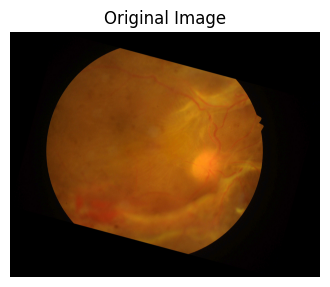

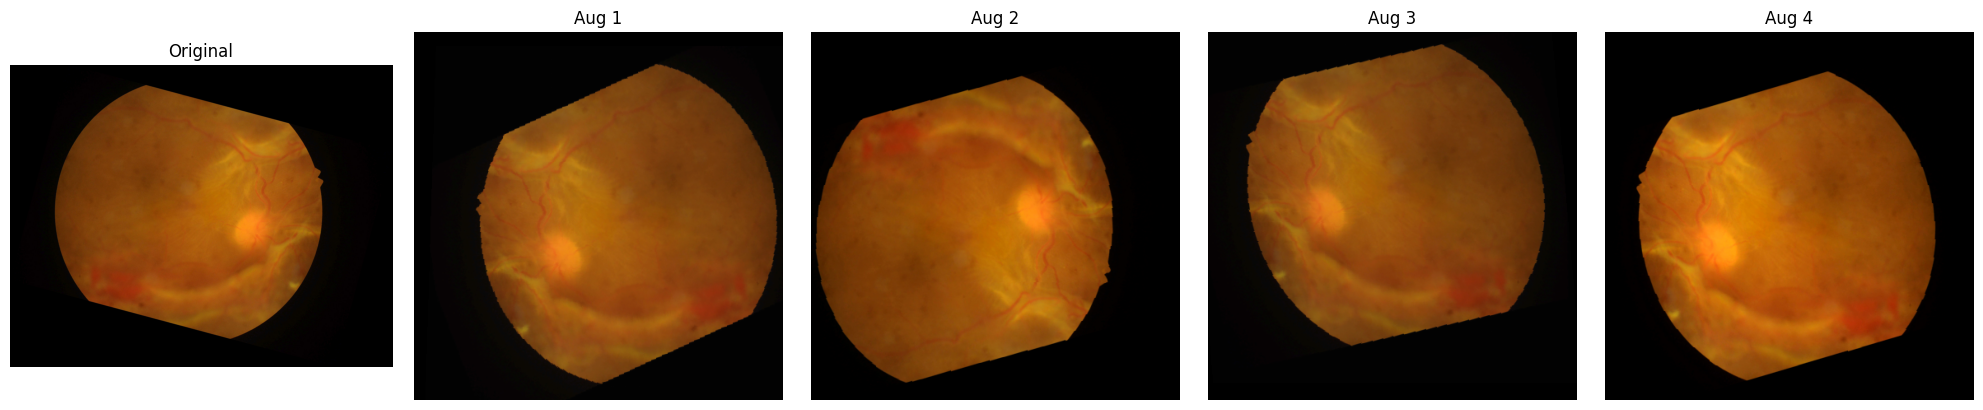

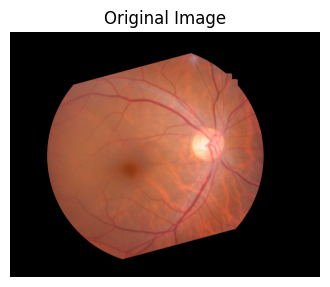

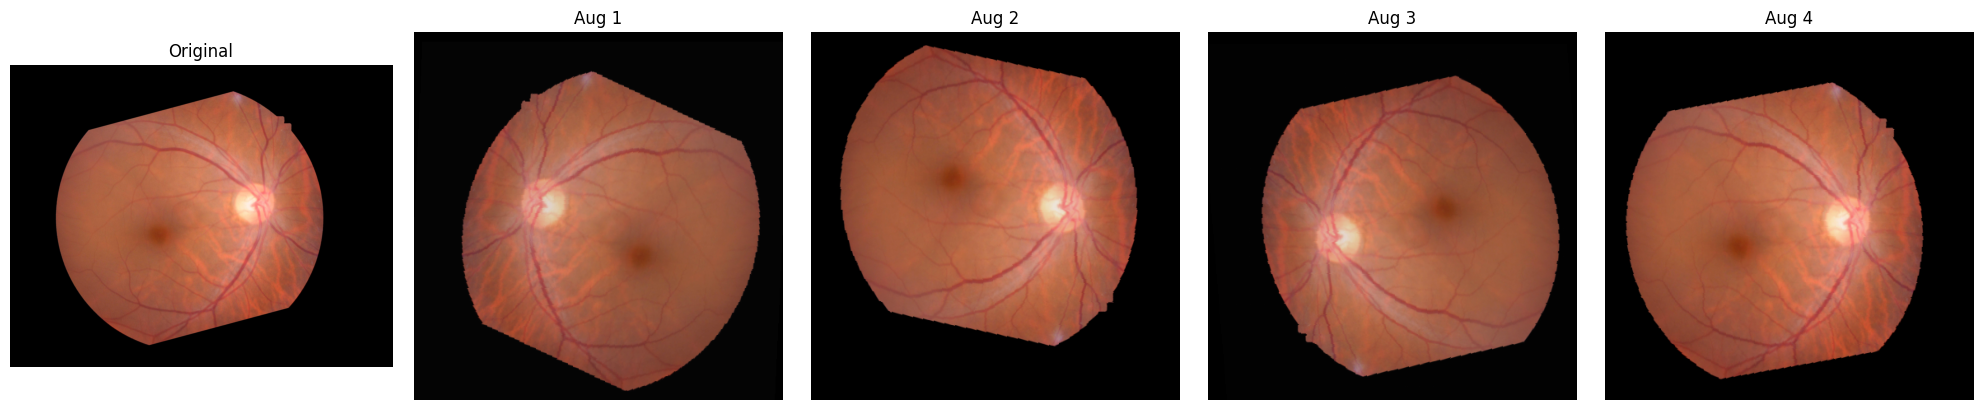

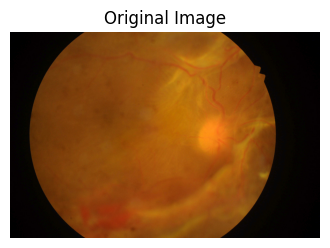

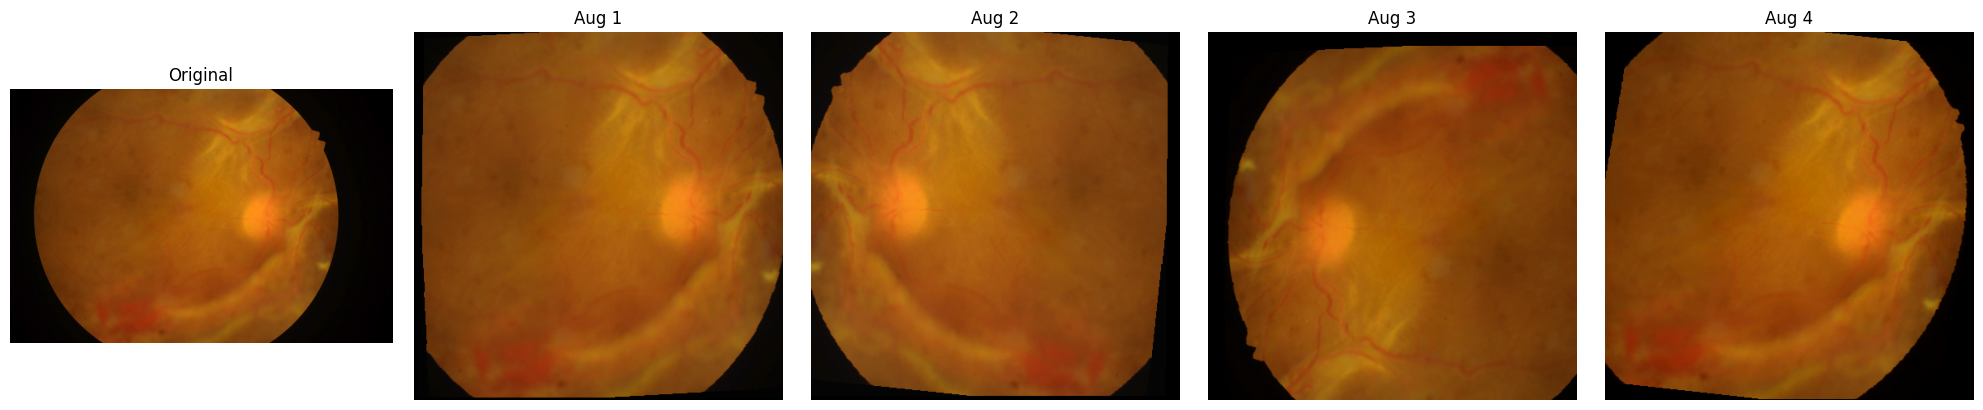

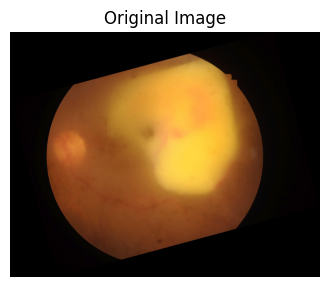

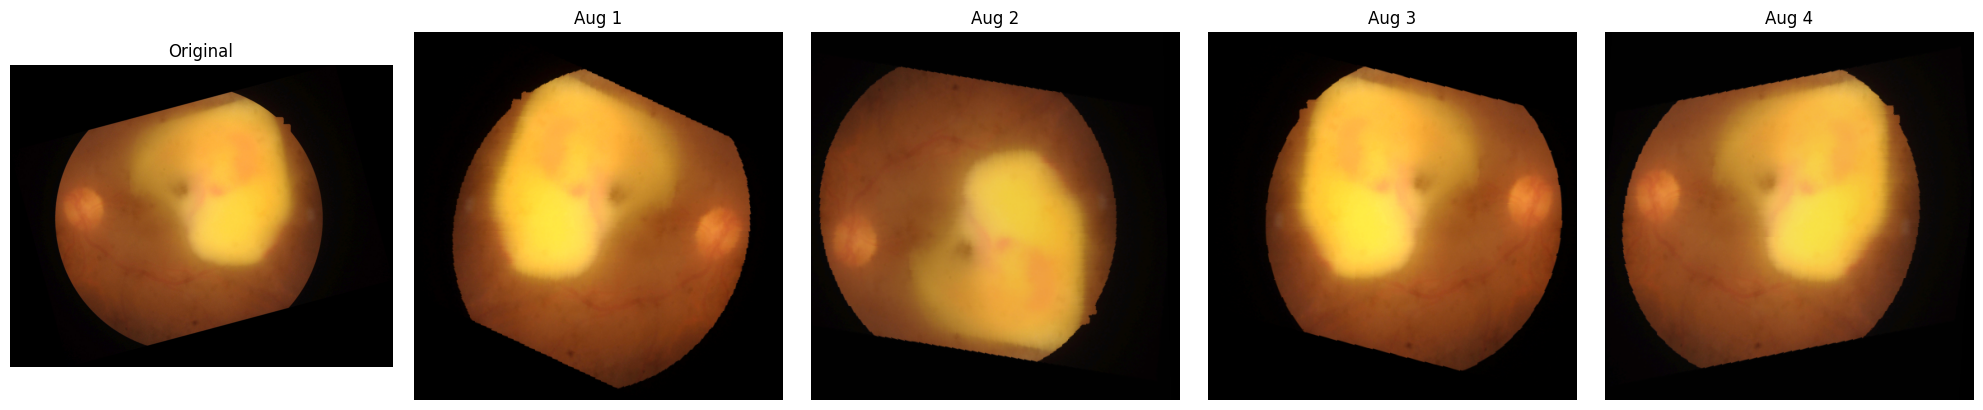

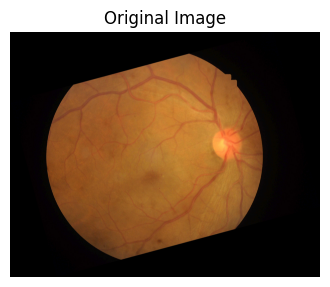

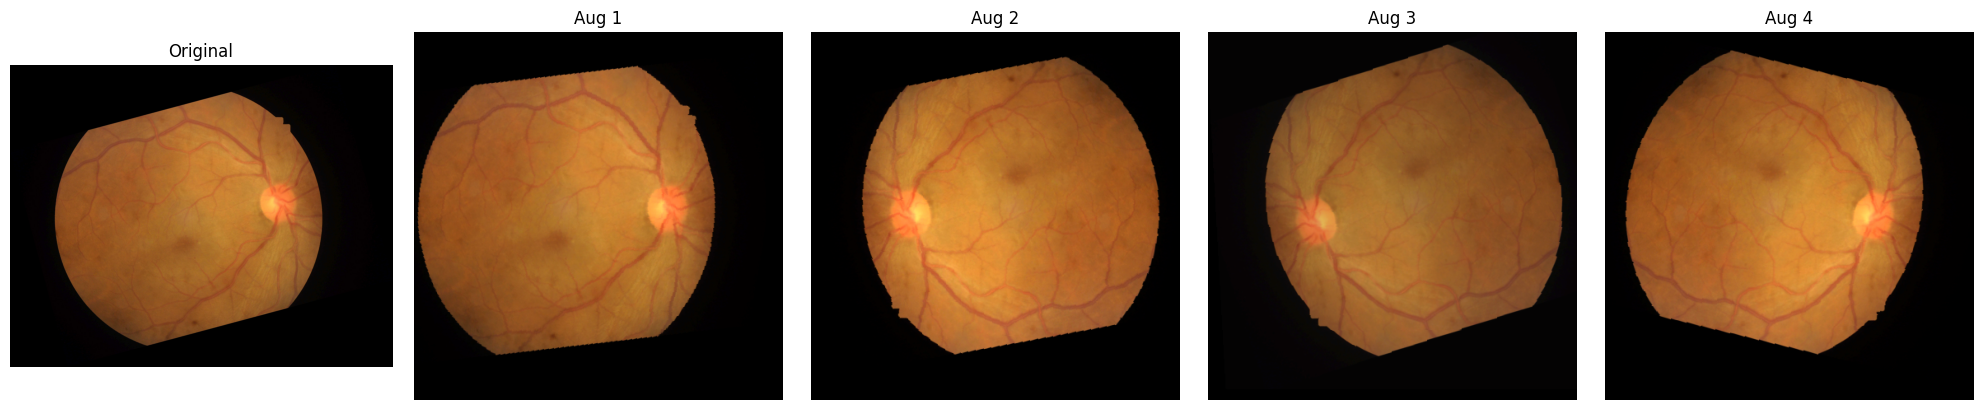

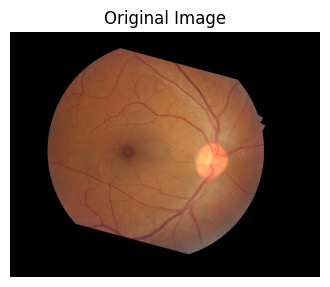

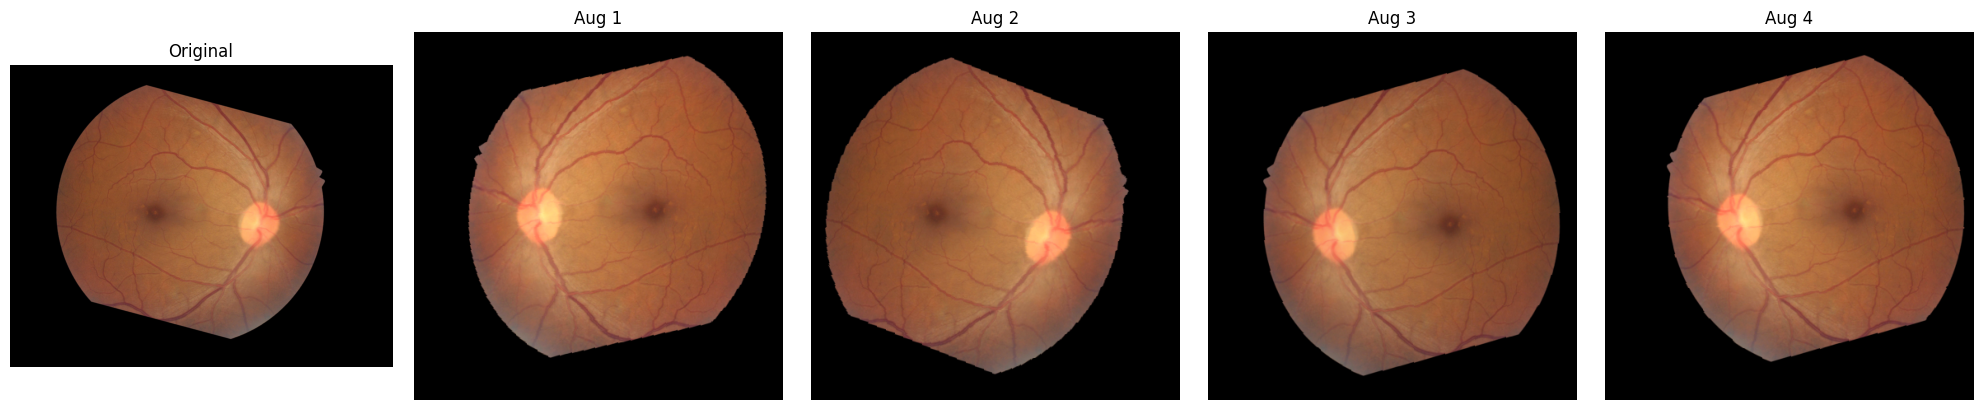

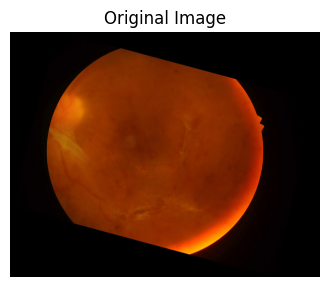

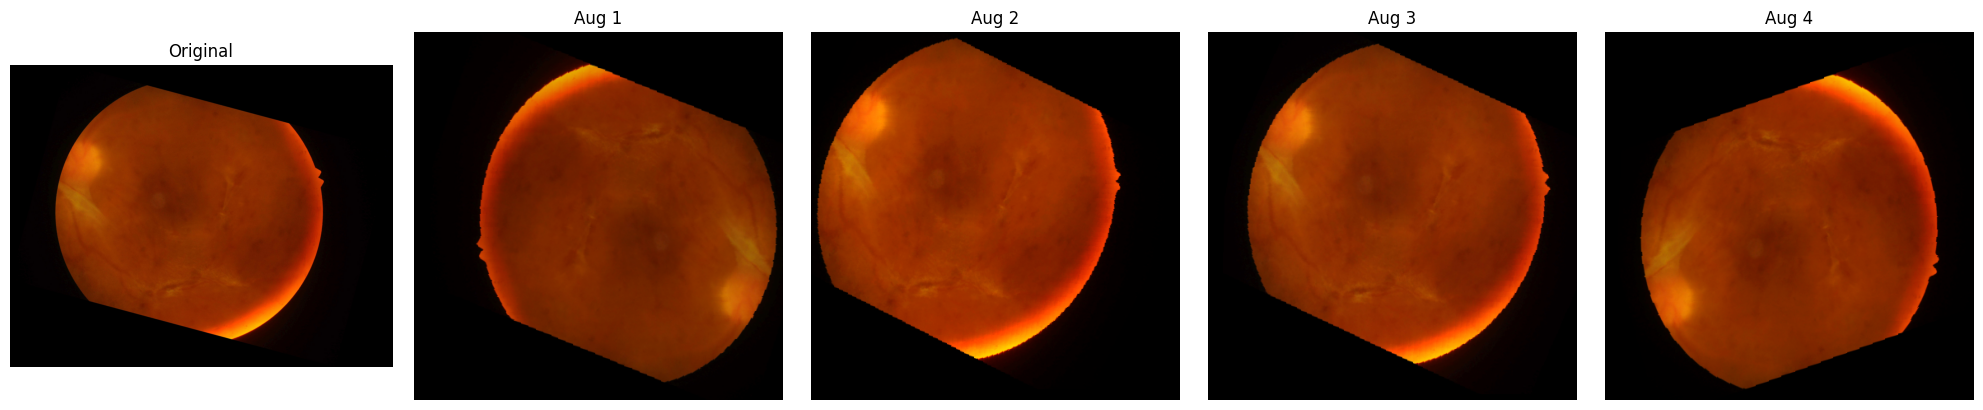

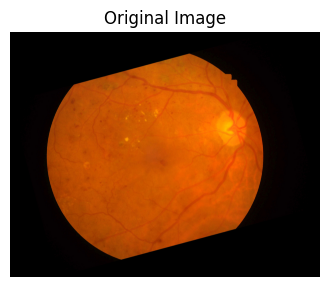

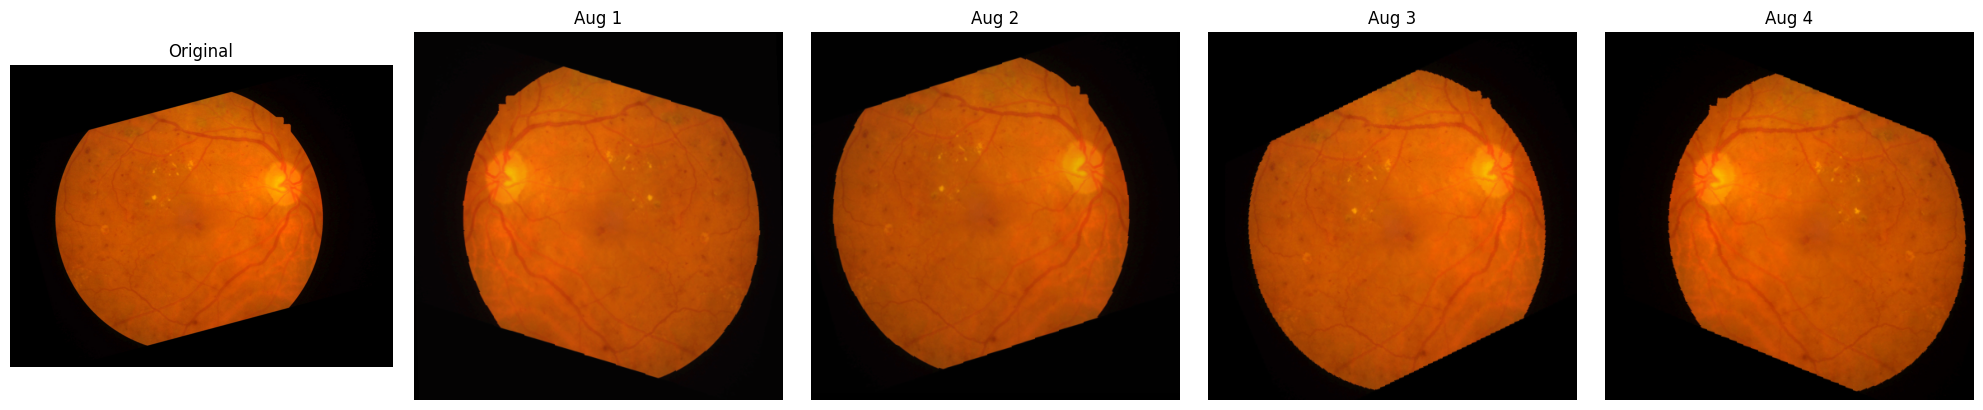

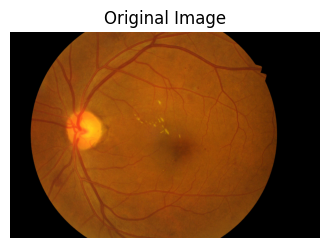

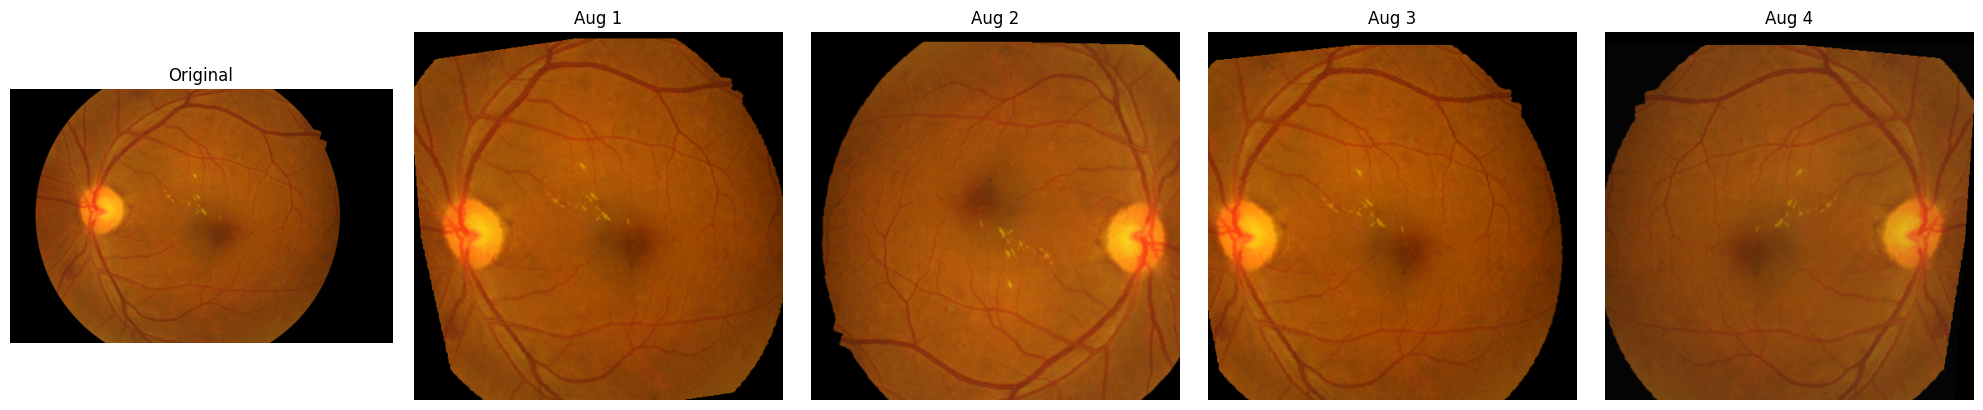

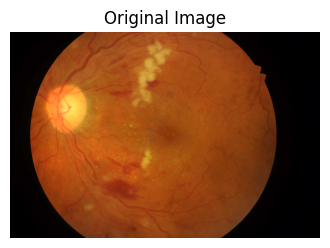

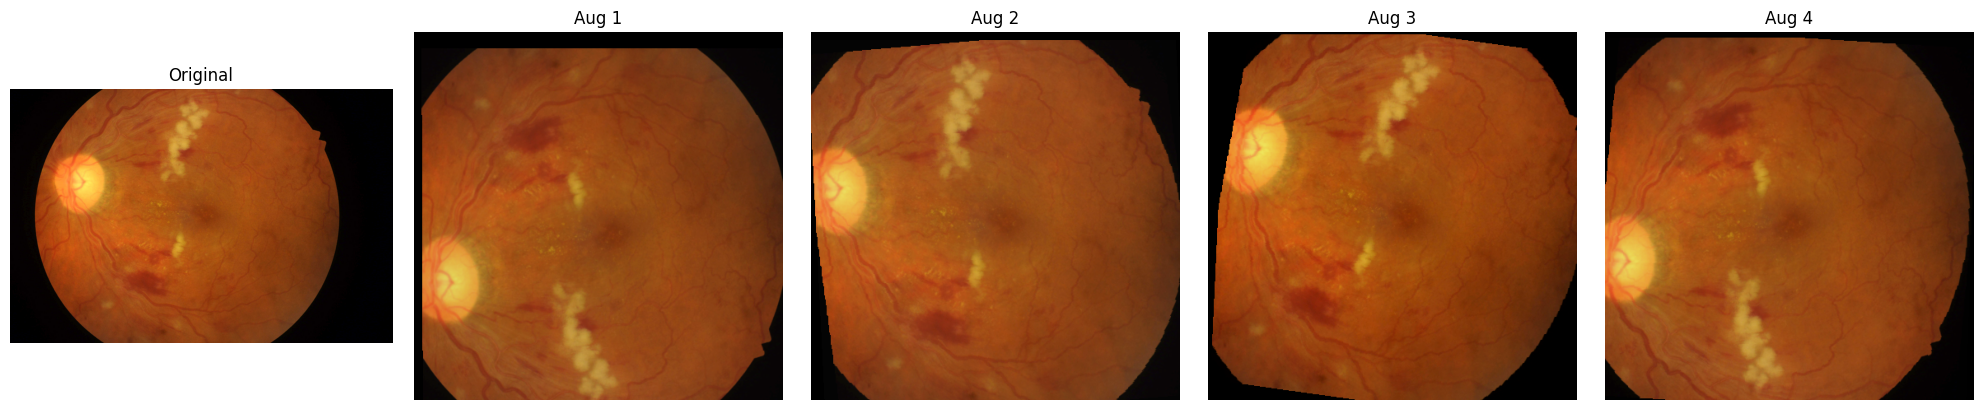

In [10]:
for _ in range(10):
    image_path = dataset.image_paths[random.randint(0, len(dataset.image_paths) - 1)]
    train_transform = get_image_transforms((448, 448), data_type="train")
    show_original_and_augmentations(image_path, train_transform, n=4)